In [1]:
import math
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
a = [i for i in range(1, 16)]
a

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [3]:
b = [i for i in range(1, 44, 3)]
b

[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]

In [4]:
d = ["quatre", "chaine", "de", "caractères"]
d

['quatre', 'chaine', 'de', 'caractères']

In [5]:
a = np.array(a)
b = np.array(b)
a, b

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37, 40, 43]))

In [6]:
a += 2
a *= 2
a

array([ 6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34])

In [7]:
a * b

array([   6,   32,   70,  120,  182,  256,  342,  440,  550,  672,  806,
        952, 1110, 1280, 1462])

In [8]:
b.mean(), b.var(), b.std(), np.median(b), b.min(), b.max()

(22.0, 168.0, 12.96148139681572, 22.0, 1, 43)

In [9]:
np.quantile(b, [0, 0.25, 0.5, 0.75, 1])
# np.quantile(b, [0, 0.25, 0.5, 0.75, 1], interpolation='nearest')

array([ 1. , 11.5, 22. , 32.5, 43. ])

In [10]:
def moyenne(x):
    m = 0
    for i in x:
        m += i
    return m / len(x)

def variance(x):
    v = 0
    m = moyenne(x)
    for i in x:
        v += (i - m)**2
    return v / len(x)

def ecarttype(x):
    return math.sqrt(variance(x))
        

moyenne(b), variance(b), ecarttype(b)

(22.0, 168.0, 12.96148139681572)

In [11]:
vals_norm = np.random.normal(loc=10, scale=2, size=15)
vals_norm

array([10.16015516,  8.0682912 , 13.74880552,  7.72819992,  7.72988653,
       10.97627873,  8.58854411,  8.75413973, 10.00392887, 11.41204177,
       11.17638093, 12.14474092,  9.80961428,  9.9290227 , 13.42009024])

In [12]:
vals_unif = np.random.uniform(low=0, high=20, size=15)
vals_unif

array([12.52406004,  5.06813774, 15.37022136, 12.6538523 ,  0.12421111,
       10.94809115,  7.19761303,  0.92860508, 13.69315985,  9.35898567,
       18.3268273 ,  8.58734474, 10.97272157,  7.71717633, 16.54117992])

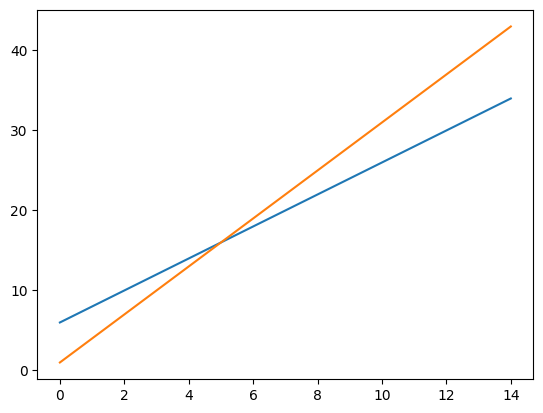

In [13]:
plt.plot(range(0, 15), a, b)
plt.show()

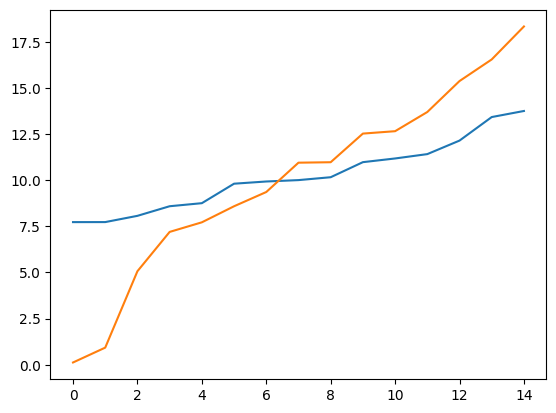

(7.728199918632633, 13.748805523428029, 0.12421110601306129, 18.32682730476207)

In [14]:
ax = plt.plot(range(0, 15), sorted(vals_norm), sorted(vals_unif))
plt.show()
vals_norm.min(), vals_norm.max(), vals_unif.min(), vals_unif.max()

In [15]:
df_a = pd.DataFrame(data=vals_norm, columns=['norm'])
df_b = pd.DataFrame(data=vals_unif, columns=['unif'])
df = pd.concat([df_a, df_b], axis=1)
df.head(3)

,norm,unif
0,10.160155,12.524060
1,8.068291,5.068138
2,13.748806,15.370221


In [16]:
ecarttype(vals_norm)

1.8520334291314082

In [17]:
df.norm.std() / math.sqrt(15) * math.sqrt(14)

1.8520334291314082

In [18]:
df['norm'].cov(df['unif']) / 15 * 14

6.057090924219448

In [19]:
sum((df['norm'] - df['norm'].mean()) * (df['unif'] - df['unif'].mean())) / len(df['unif'])

6.057090924219447

In [20]:
df['norm'].corr(df['unif'])

0.6418303923274362

In [21]:
r = df['norm'].corr(df['unif'])
a = r * ecarttype(df['norm']) / ecarttype(df['unif'])
a

0.2332781735042774

In [22]:
moyenne(df['unif'] - a * moyenne(df['norm']))

7.611264511476236

In [23]:
a = np.random.normal(loc=10, scale=2, size=20)
b = np.random.uniform(low=0, high=20, size=20)
df_a = pd.DataFrame(data=a, columns=['norm'])
df_b = pd.DataFrame(data=b, columns=['unif'])
df_2 = pd.concat([df_a, df_b], axis=1)
df_2.head(3)

,norm,unif
0,14.104693,5.214315
1,8.918477,7.387375
2,8.968162,8.976020


In [24]:
df = pd.concat([df, df_2], ignore_index=True)
len(df)

35

In [25]:
df['somme'] = df.norm + df.unif

In [26]:
df[df.unif > 5].head()

,norm,unif,somme
0,10.160155,12.524060,22.684215
1,8.068291,5.068138,13.136429
2,13.748806,15.370221,29.119027
3,7.728200,12.653852,20.382052
5,10.976279,10.948091,21.924370


In [27]:
df[['norm', 'somme']].head()

,norm,somme
0,10.160155,22.684215
1,8.068291,13.136429
2,13.748806,29.119027
3,7.728200,20.382052
4,7.729887,7.854098
